# Data Exploration And Analysis

---

In this notebook, we are going to work on the comprehension of the data put at our disposition.

For that, we will divide it into two steps:
* Exploration
* Analysis

Airbnb and Kaggle had provided to us 6 tabular data files:
* *age_gender_bkts.csv*: summary statistics of users’ age group, gender and country of destination
* *countries.csv*: summary statistics of destination countries in the dataset and their locations
* *sample_submission_NDF.csv*: correct format for submitting predictions for the challenge
* *sessions.csv*: web sessions log for users
* *test_users.csv*: testing set of users
* *train_users_2.csv*: training set of users

Clearly, if the data files *sample_submission_NDF.csv* and *test_users.csv* had their utility in the context of the challenge, here, we will only give a look to them, and then focus our energy on the comprehension of the other data files.

As always, the prerequisite step consists on loading the appropriate packages to perform our work:

In [1]:
# Activate 'airbnb' environment:
!source activate airbnb

In [2]:
# Needed packages:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

---

## Exploration

### *age_gender_bkts.csv*

In [3]:
# Load the data:
age_gender_bkts = pd.read_csv("../data/age_gender_bkts.csv")

# Check basic info:
print("*** Some basic info:")
print("'age_gender_bkts' has {} data points with {} variables each.".format(*age_gender_bkts.shape))
print("'age_gender_bkts' counts {} missing values.".format(age_gender_bkts.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(age_gender_bkts.head(n=21))

*** Some basic info:
'age_gender_bkts' has 420 data points with 5 variables each.
'age_gender_bkts' counts 0 missing values.

*** First lines:


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


Let's perform some additional checks.

In [4]:
# Determine unique values by columns:
age_gender_bkts_cols = []
for col in age_gender_bkts.columns:
    age_gender_bkts_cols.append(col)
age_gender_bkts_cols.remove('population_in_thousands')
print("*** Additional checks:")
for col in age_gender_bkts_cols:
    print("- Column '{}' possible values:\n{}".format(col, age_gender_bkts[col].unique().tolist()))

*** Additional checks:
- Column 'age_bucket' possible values:
['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']
- Column 'country_destination' possible values:
['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US']
- Column 'gender' possible values:
['male', 'female']
- Column 'year' possible values:
[2015.0]


As we can see, this first tabular data file lists, for the year 2015, the volume of new users who have chosen between 10 possible destination countries (Australia, Canada, Germany, Spain, France, Great Britain, Italy, Netherlands, Portugal and USA) as their first Airbnb booking, segmented by gender and age repartition.

We can now perform some visualizations of the data:

In [5]:
# Set abscissa values:
age_bucket = age_gender_bkts['age_bucket'].unique().tolist()

# Determine ordinate values:
country_destination = ['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US']

def explore_age_gender_bkts(country_destination, age_bucket, age_gender_bkts):
    user_tab = []
    gender_tab = ['male', 'female']
    for country in country_destination:
        male_tab = []
        female_tab = []
        for age in age_bucket:
            for gender in gender_tab:
                filter_tab = age_gender_bkts[(age_gender_bkts['country_destination'] == country) &
                                             (age_gender_bkts['age_bucket'] == age) &
                                             (age_gender_bkts['gender'] == gender)]
                if gender == 'male':
                    male_tab.append(filter_tab['population_in_thousands'].tolist()[0])
                else:
                    female_tab.append(filter_tab['population_in_thousands'].tolist()[0])
        user_tab.append([male_tab, female_tab])
    return user_tab

user_tab = explore_age_gender_bkts(country_destination, age_bucket, age_gender_bkts)

# Configure abscissa values for plotting:
age_bucket.reverse()

# Configure ordinate values for plotting:
for country in user_tab:
    for gender in country:
        gender.reverse()

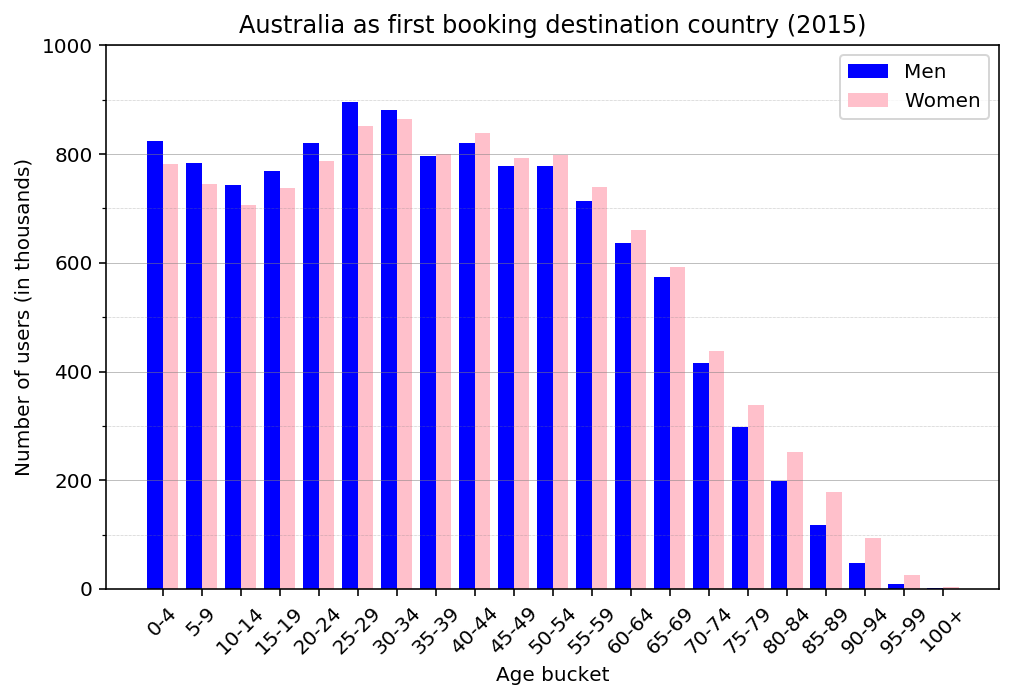

In [6]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Australia as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[0][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[0][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 1000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(11))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_AU.png', bbox_inches='tight')

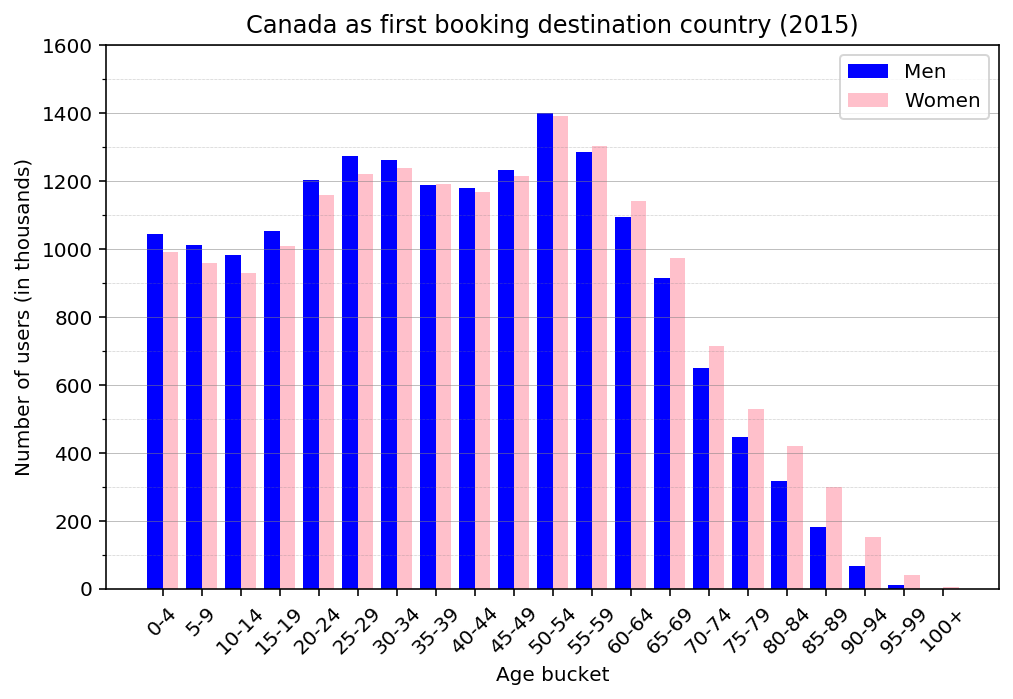

In [7]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Canada as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[1][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[1][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 1600)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(9))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(17))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_CA.png', bbox_inches='tight')

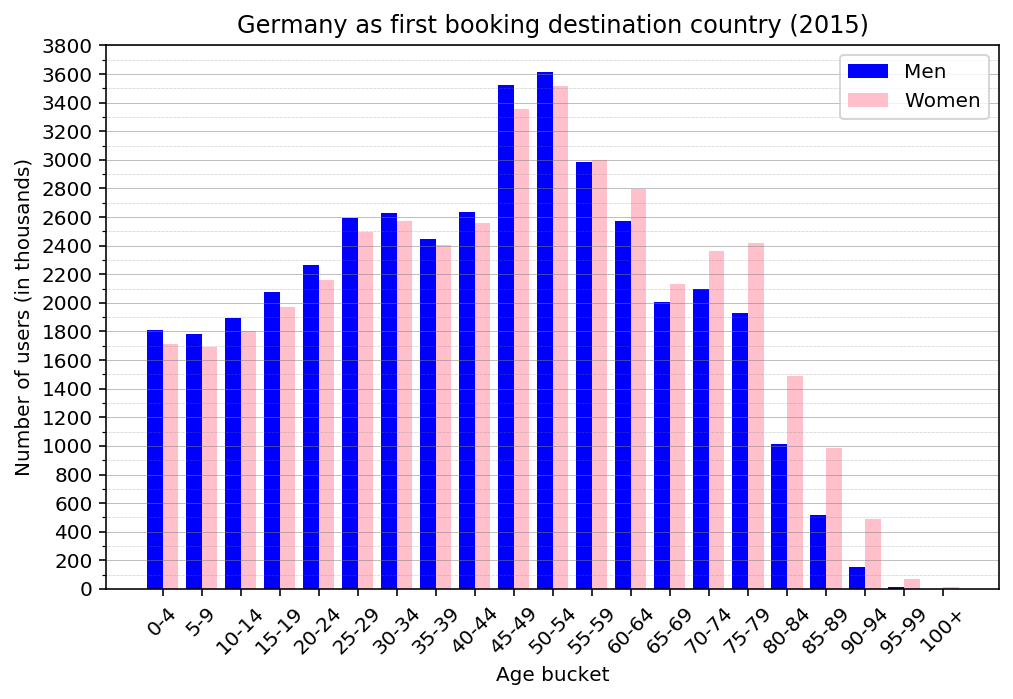

In [8]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Germany as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[2][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[2][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 3800)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(39))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_DE.png', bbox_inches='tight')

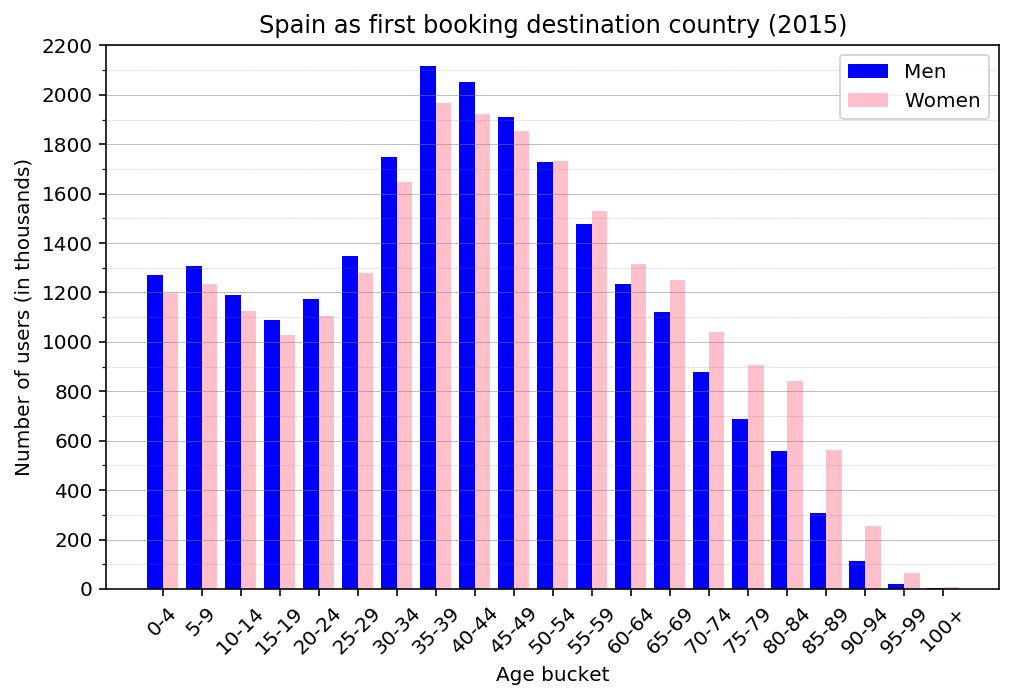

In [9]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Spain as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[3][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[3][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 2200)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(12))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(23))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_ES.png', bbox_inches='tight')

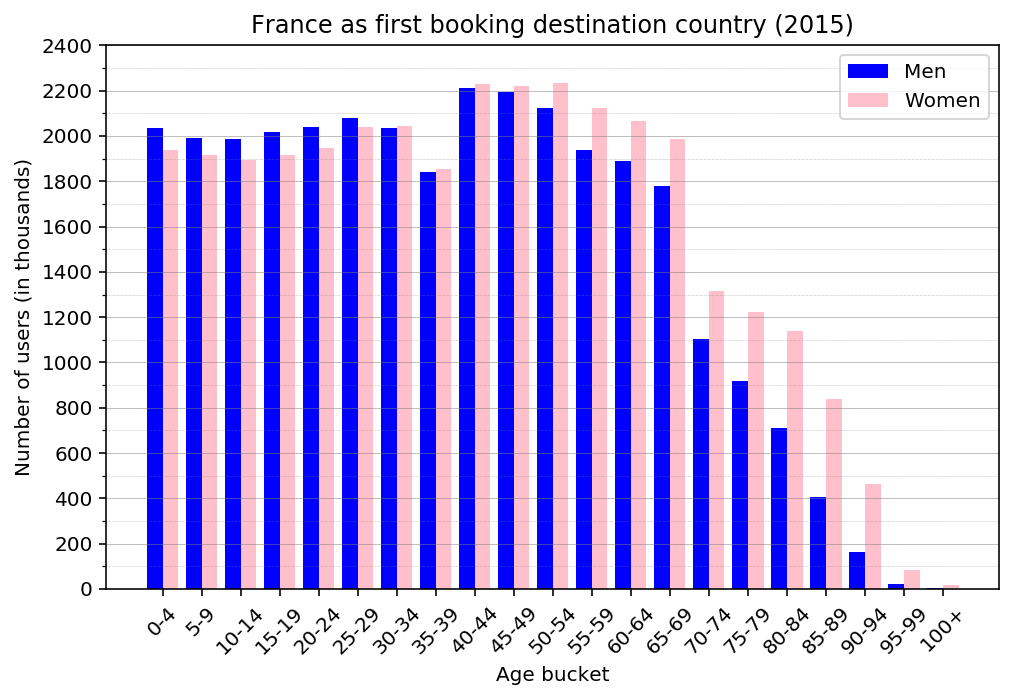

In [10]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("France as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[4][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[4][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 2400)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(13))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(25))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_FR.png', bbox_inches='tight')

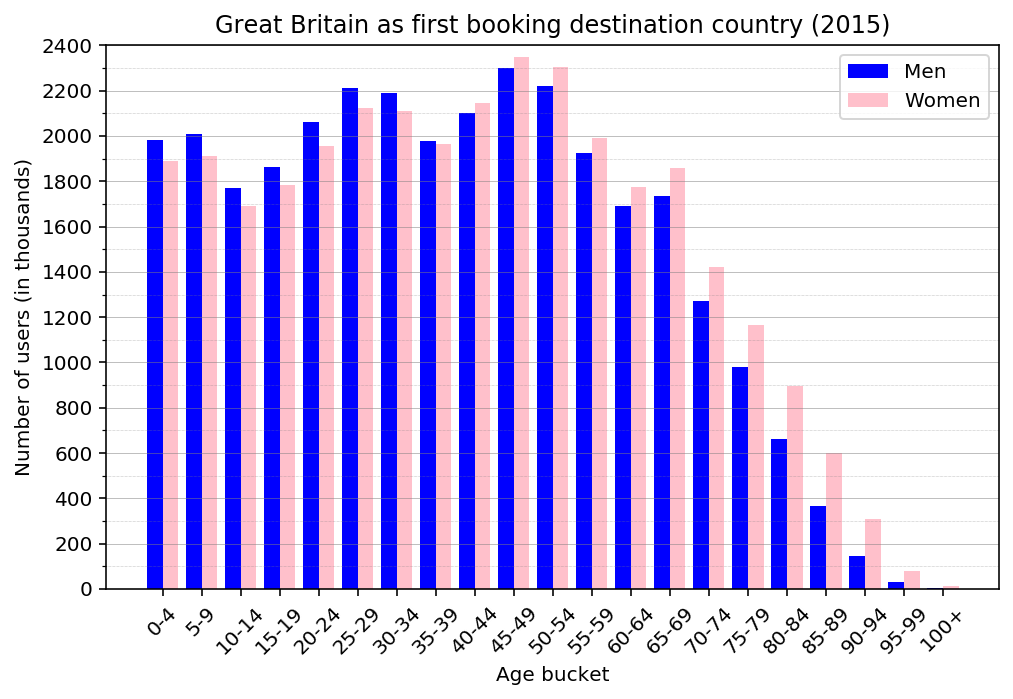

In [11]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Great Britain as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[5][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[5][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 2400)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(13))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(25))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_GB.png', bbox_inches='tight')

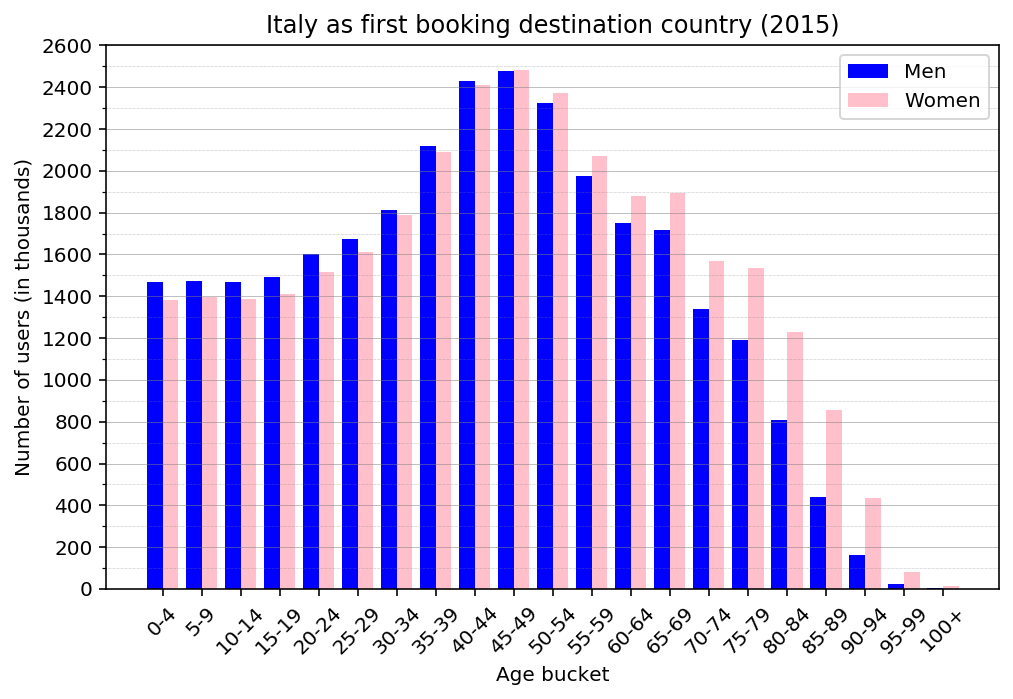

In [12]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Italy as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[6][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[6][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 2600)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(14))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(27))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_IT.png', bbox_inches='tight')

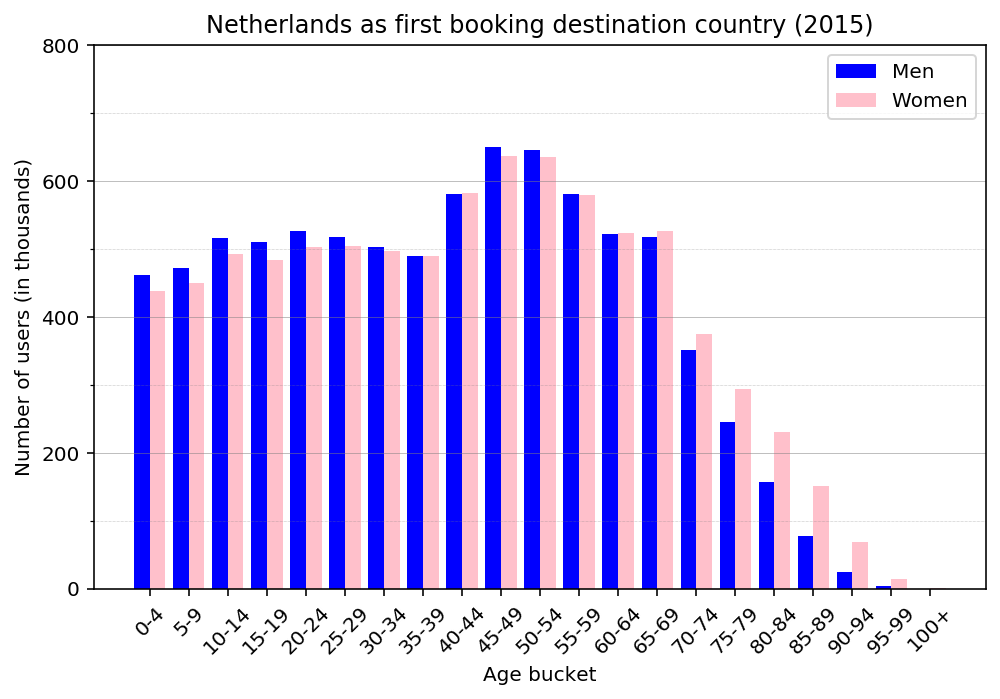

In [13]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Netherlands as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[7][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[7][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 800)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(9))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_NL.png', bbox_inches='tight')

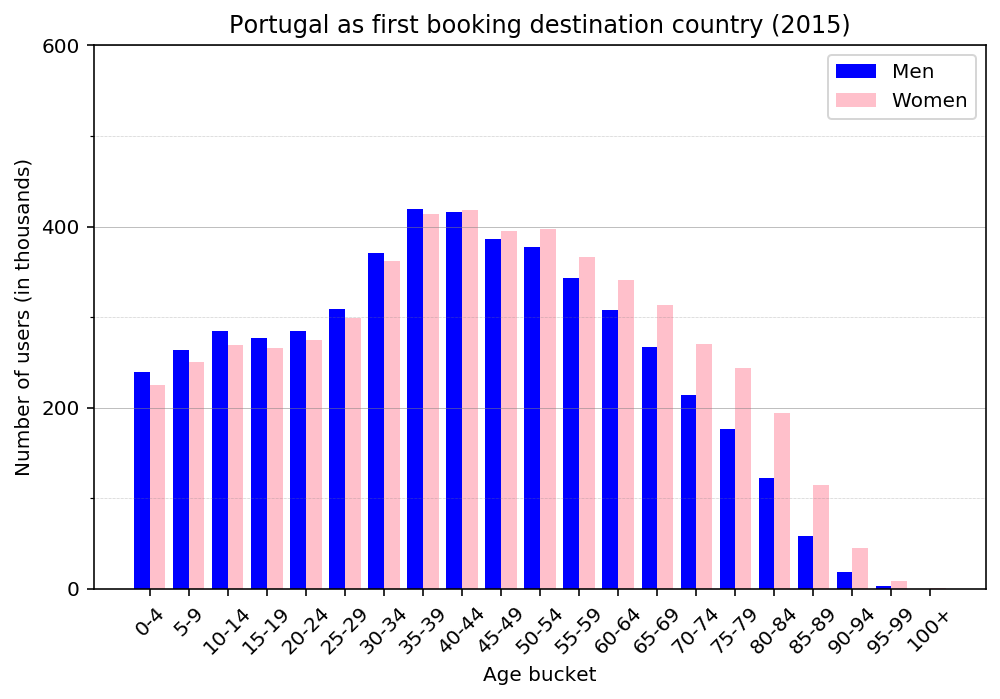

In [14]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Portugal as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[8][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[8][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 600)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(6))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_PT.png', bbox_inches='tight')

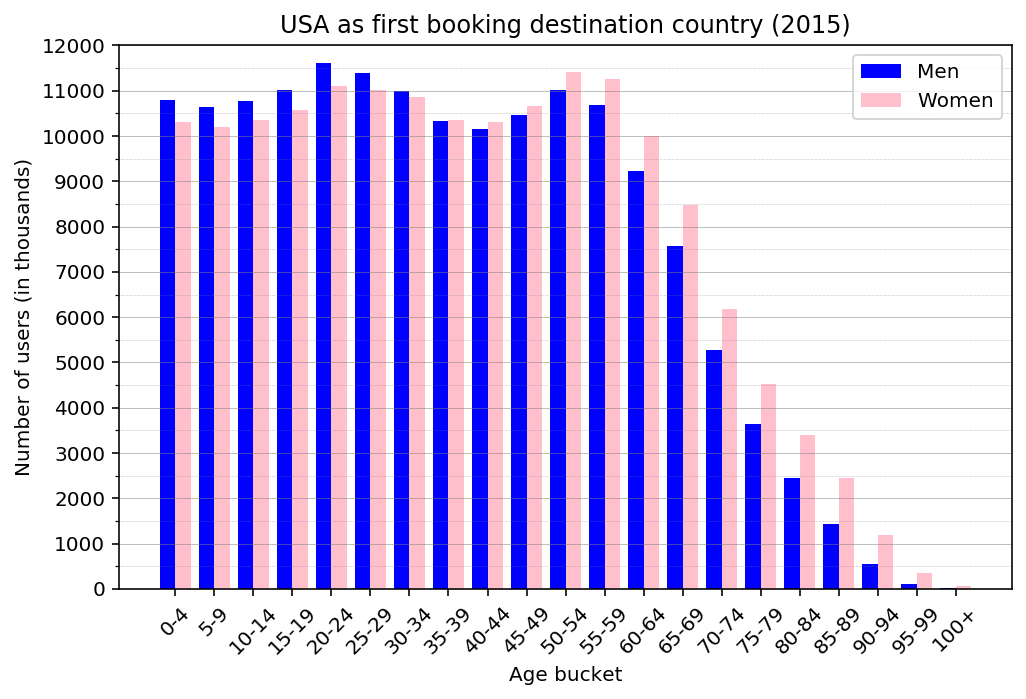

In [15]:
# Represent the data contained in age_gender_bkts:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(21)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("USA as first booking destination country (2015)")
ax.bar(x_values - width_rec/2,
       user_tab[9][0],
       width=width_rec,
       color='blue',
       label='Men')
ax.bar(x_values + width_rec/2,
       user_tab[9][1],
       width=width_rec,
       color='pink',
       label='Women')
ax.set_xticks(x_values)
ax.set_xticklabels(age_bucket, rotation=45)
ax.set_xlabel('Age bucket')
ax.set_ylim(0, 12000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(13))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(25))
ax.set_ylabel('Number of users (in thousands)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)
ax.legend(loc=1)

# Save the graph:
fig.savefig('../graphs/age_gender_bkts_US.png', bbox_inches='tight')

### *countries.csv*

In [16]:
# Load the data:
countries = pd.read_csv("../data/countries.csv")

# Check basic info:
print("*** Some basic info:")
print("'countries' has {} data points with {} variables each.".format(*countries.shape))
print("'countries' counts {} missing values.".format(countries.isnull().sum().sum()))

# Give a look to the data:
print("\n*** Check the data:")
display(countries)

*** Some basic info:
'countries' has 10 data points with 7 variables each.
'countries' counts 0 missing values.

*** Check the data:


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Here, 3 features seem interessant:
* The distance between each possible first booking destination country for Airbnb's panel new users and the USA
* The area of each possible first booking destination country for Airbnb's panel new users
* The Levenshtein distance between the language of each possible first booking destination country for Airbnb's panel new users and the USA language

In [17]:
# Set abscissa values:
country_destination = countries['country_destination'].tolist()

# Set ordinate values:
distance_km = countries['distance_km'].tolist()
destination_km2_tmp = countries['destination_km2'].tolist()
destination_km2 = []
for area in destination_km2_tmp:
    destination_km2.append(area/1000000.)
language_levenshtein_distance = countries['language_levenshtein_distance'].tolist()

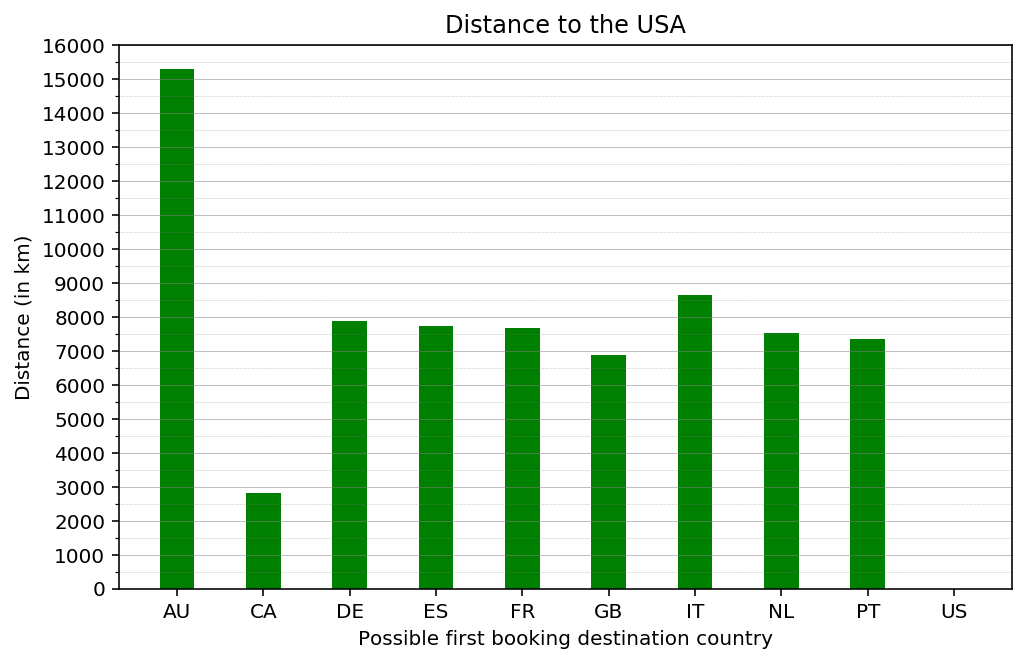

In [18]:
# Represent the data contained in countries:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(10)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Distance to the USA")
ax.bar(x_values,
       distance_km,
       width=width_rec,
       color='green')
ax.set_xticks(x_values)
ax.set_xticklabels(country_destination)
ax.set_xlabel("Possible first booking destination country")
ax.set_ylim(0, 16000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(17))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(33))
ax.set_ylabel('Distance (in km)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/countries_distance_km.png', bbox_inches='tight')

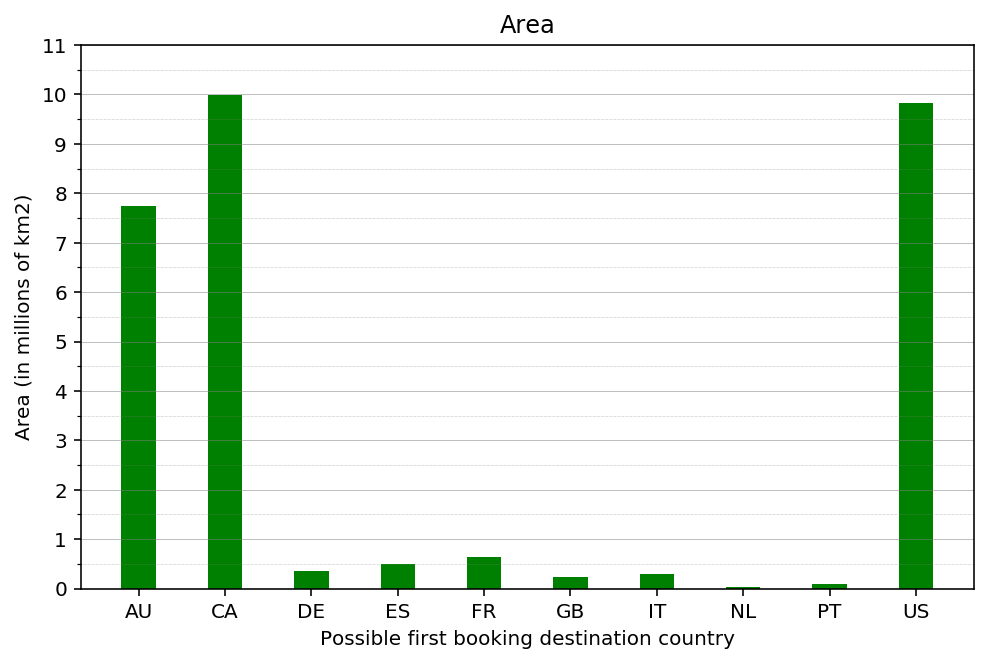

In [19]:
# Represent the data contained in countries:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(10)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Area")
ax.bar(x_values,
       destination_km2,
       width=width_rec,
       color='green')
ax.set_xticks(x_values)
ax.set_xticklabels(country_destination)
ax.set_xlabel("Possible first booking destination country")
ax.set_ylim(0, 11)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(12))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(23))
ax.set_ylabel('Area (in millions of km2)')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/countries_destination_km2.png', bbox_inches='tight')

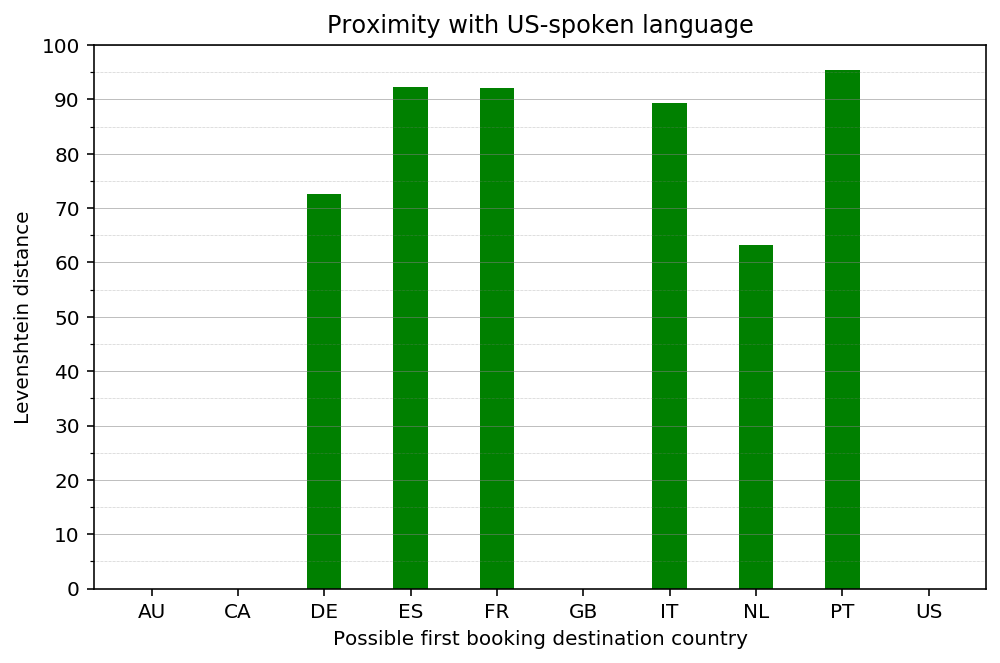

In [20]:
# Represent the data contained in countries:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(10)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("Proximity with US-spoken language")
ax.bar(x_values,
       language_levenshtein_distance,
       width=width_rec,
       color='green')
ax.set_xticks(x_values)
ax.set_xticklabels(country_destination)
ax.set_xlabel("Possible first booking destination country")
ax.set_ylim(0, 100)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(11))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(21))
ax.set_ylabel('Levenshtein distance')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/countries_language_levenshtein_distance.png', bbox_inches='tight')

### *sample_submission_NDF.csv*

In [21]:
# Load the data:
sample_submission_NDF = pd.read_csv("../data/sample_submission_NDF.csv")

# Check basic info:
print("*** Some basic info:")
print("'sample_submission_NDF' has {} data points with {} variables each.".format(*sample_submission_NDF.shape))
print("'sample_submission_NDF' counts {} missing values.".format(sample_submission_NDF.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(sample_submission_NDF.head(n=10))

*** Some basic info:
'sample_submission_NDF' has 62096 data points with 2 variables each.
'sample_submission_NDF' counts 0 missing values.

*** First lines:


,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
5,szx28ujmhf,NDF
6,guenkfjcbq,NDF
7,tkpq0mlugk,NDF
8,3xtgd5p9dn,NDF
9,md9aj22l5a,NDF


As it has been said in the introduction, if this file had its interest in the context of the Kaggle's challenge, it is not relevant anymore for this project.

### *sessions.csv*

In [22]:
# Load the data:
sessions = pd.read_csv("../data/sessions.csv")

# Check basic info:
print("*** Some basic info:")
print("'sessions' has {} data points with {} variables each.".format(*sessions.shape))
print("'sessions' counts {} missing values.".format(sessions.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(sessions.head(n=10))

*** Some basic info:
'sessions' has 10567737 data points with 6 variables each.
'sessions' counts 2502561 missing values.

*** First lines:


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


As it can be observed above, in this tabular data file, which corresponds to web sessions log for users, a lot of of missing values can be counted, and some labels (e.g. `NaN`) clearly indicate us that precise values are not well determined.

Let's go ahead with further investigations:

In [23]:
# Work on 'user_id':
user_id_null = sessions['user_id'].isnull().sum()
user_id_unique = len(sessions['user_id'].unique().tolist())

# Work on 'action':
action_null = sessions['action'].isnull().sum()
action_list = sessions['action'].unique().tolist()
action_unique = len(action_list)

# Work on 'action_type':
action_type_null = sessions['action_type'].isnull().sum()
action_type_list = sessions['action_type'].unique().tolist()

# Work on 'action_detail':
action_detail_null = sessions['action_detail'].isnull().sum()
action_detail_list = sessions['action_detail'].unique().tolist()
action_detail_unique = len(action_detail_list)

# Work on 'device_type':
device_type_null = sessions['device_type'].isnull().sum()
device_type_list = sessions['device_type'].unique().tolist()

# Work on 'secs_elapsed':
secs_elapsed_null = sessions['device_type'].isnull().sum()

# Further details:
print("*** Further details:")
print("- 'user_id' counts {} missing values and {} unique IDs.".format(user_id_null, user_id_unique))
print("- 'action' counts {} missing values and has {} possible values.".format(action_null, action_unique))
print("(Some examples: {}, {}, {}, etc, etc)".format(action_list[42], action_list[21], action_list[84]))
print("- 'action_type' counts {} missing values and has the following possible values:\n{}".format(action_type_null, action_type_list))
print("- 'action_detail' counts {} missing values and has {} possible values.".format(action_detail_null, action_detail_unique))
print("(Some examples: {}, {}, {}, etc, etc)".format(action_detail_list[42], action_detail_list[21], action_detail_list[84]))
print("- 'device_type' counts {} missing values and has the following possible values:\n{}".format(device_type_null, device_type_list))
print("- 'secs_elapsed' counts {} missing values.".format(secs_elapsed_null))

*** Further details:
- 'user_id' counts 34496 missing values and 135484 unique IDs.
- 'action' counts 79626 missing values and has 360 possible values.
(Some examples: qt_reply_v2, verify, update_notifications, etc, etc)
- 'action_type' counts 1126204 missing values and has the following possible values:
[nan, 'click', 'data', 'view', 'submit', 'message_post', '-unknown-', 'booking_request', 'partner_callback', 'booking_response', 'modify']
- 'action_detail' counts 1126204 missing values and has 156 possible values.
(Some examples: create_listing, wishlist, signup, etc, etc)
- 'device_type' counts 0 missing values and has the following possible values:
['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone', 'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet', 'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch', 'Windows Phone', 'Opera Phone']
- 'secs_elapsed' counts 0 missing values.


Further details on the tabular data file give us some more information:
* We can note that other labels (e.g. `-unknwon-`) indicate use that precise values are not well determined
* It exists a wide array of actions, action types and action details which characterize web sessions log for users activities, with some of them linked to booking (see `action_type` possible values)

### *test_users.csv*

In [24]:
# Load the data:
test_users = pd.read_csv("../data/test_users.csv")

# Check basic info:
print("*** Some basic info:")
print("'test_users' has {} data points with {} variables each.".format(*test_users.shape))
print("'test_users' counts {} missing values.".format(test_users.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(test_users.head(n=10))

*** Some basic info:
'test_users' has 62096 data points with 15 variables each.
'test_users' counts 90992 missing values.

*** First lines:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


As it has been said earlier when analyzing the tabular data file *sample_submission_NDF.csv*, if this file had its interest in the context of the Kaggle's challenge, it is not relevant anymore for this project: Indeed, it provides no information about the destination's country chosen by the various listed users, thus, it can't be used during the supervised learning approach we are going to deploy later to build a prediction model able to tackle the problem we are focused on during this project.

### *train_users_2.csv*

In [25]:
# Load the data:
train_users_2 = pd.read_csv("../data/train_users_2.csv")

# Check basic info:
print("*** Some basic info:")
print("'train_users_2' has {} data points with {} variables each.".format(*train_users_2.shape))
print("'train_users_2' counts {} missing values.".format(train_users_2.isnull().sum().sum()))

# Give a look to the first lines:
print("\n*** First lines:")
display(train_users_2.head(n=10))

*** Some basic info:
'train_users_2' has 213451 data points with 16 variables each.
'train_users_2' counts 218598 missing values.

*** First lines:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


This tabular data file contains the same features as the previous one (*test_users.csv*), **plus** the target variable necessary for this project: `country_destination`.

A certain amount of missing values can be counted (218598).

We can equally note that the variables have different formats:
* String: `user_id`, `gender`, `signup_method`, `language`, `affiliate_channel`, `affiliate_provider`, `first_affiliate_tracked`,  `signup_app`, `first_device_type`, `first_browser` and `country_destination`
* Date: `date_account_created`, `timestamp_first_active` and `date_first_booking`
* Numeric: `age` and `signup_flow`

Let's go on with further details on this tabular data file, beginning with account creation dates for Airbnb's panel new users:

/Applications/anaconda3/envs/airbnb/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


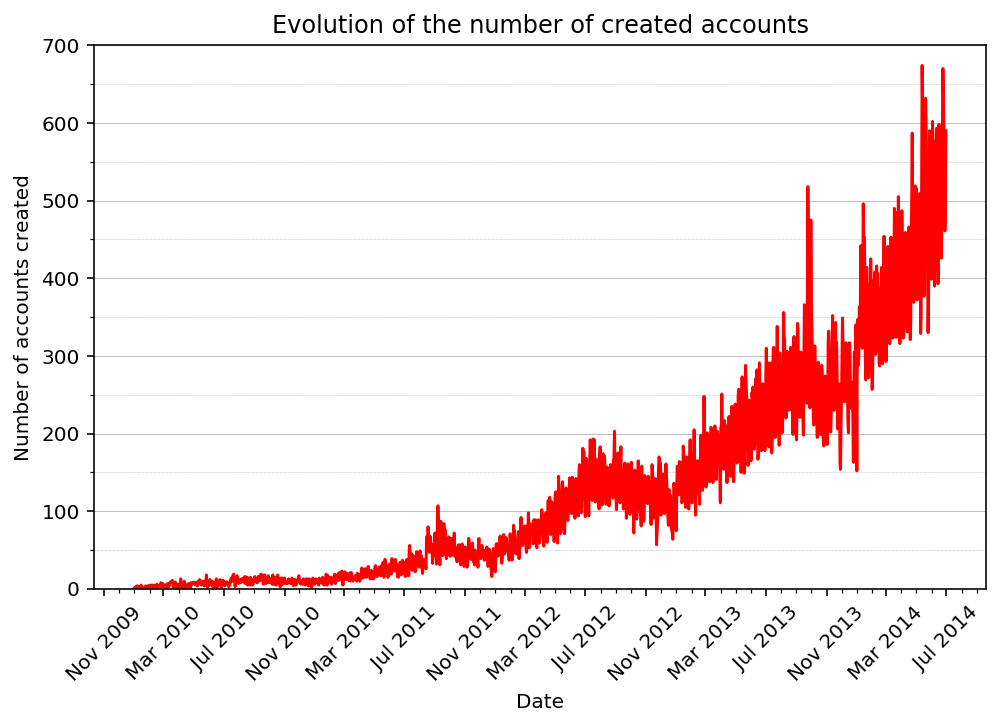

In [26]:
# Configure some variables:
date_account_created = pd.to_datetime(train_users_2['date_account_created'])
date_account_created_abscissa = date_account_created.value_counts().index.tolist()
date_account_created_ordinate = date_account_created.value_counts().tolist()
zipped_date_account_created = sorted(zip(date_account_created_abscissa, date_account_created_ordinate),
                                     key=lambda x: x[0])
date_account_created_abscissa, date_account_created_ordinate = zip(*zipped_date_account_created)

# Represent the data contained in 'date_account_created':
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("Evolution of the number of created accounts")
ax.plot(date_account_created_abscissa,
        date_account_created_ordinate,
        color='red')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date')
ax.set_ylim(0, 700)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(8))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(15))
ax.set_ylabel('Number of accounts created')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/train_users_2_date_account_created.png', bbox_inches='tight')

This graph allows us to visualize how much popular Airbnb has become over the years.

It can, too, be interesting to visualize the age repartition of Airbnb's panel new users:

In [27]:
# Work on 'age':
display(train_users_2['age'].describe())

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

Clearly, some elements seem strange:
* Minimum age is 1 year old, which is in contradiction with Airbnb eligibility terms: 18 years old is the age minimum threshold
* Maximum age is 2014 years old, which is (a lot) above normal life expectancy

Let's perform some checks:

In [28]:
# Explore ages below Airbnb's age minimum threshold:
display(train_users_2[train_users_2['age'] < 18]['age'].describe())

count    158.000000
mean      12.202532
std        5.916359
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [29]:
# Explore ages above the confirmed longest human lifespan:
display(train_users_2[train_users_2['age'] > 122]['age'].describe())

count     781.000000
mean     2006.308579
std        95.711349
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

We have to handle outliers on `age` variable, thus, we are going to remove those who seem irrelevant, and then visualize the graph:

In [30]:
# Remove outliers on 'age' variable:
train_users_2.loc[train_users_2['age'] < 16, 'age'] = np.nan
train_users_2.loc[train_users_2['age'] > 96, 'age'] = np.nan
age = train_users_2['age'].dropna()

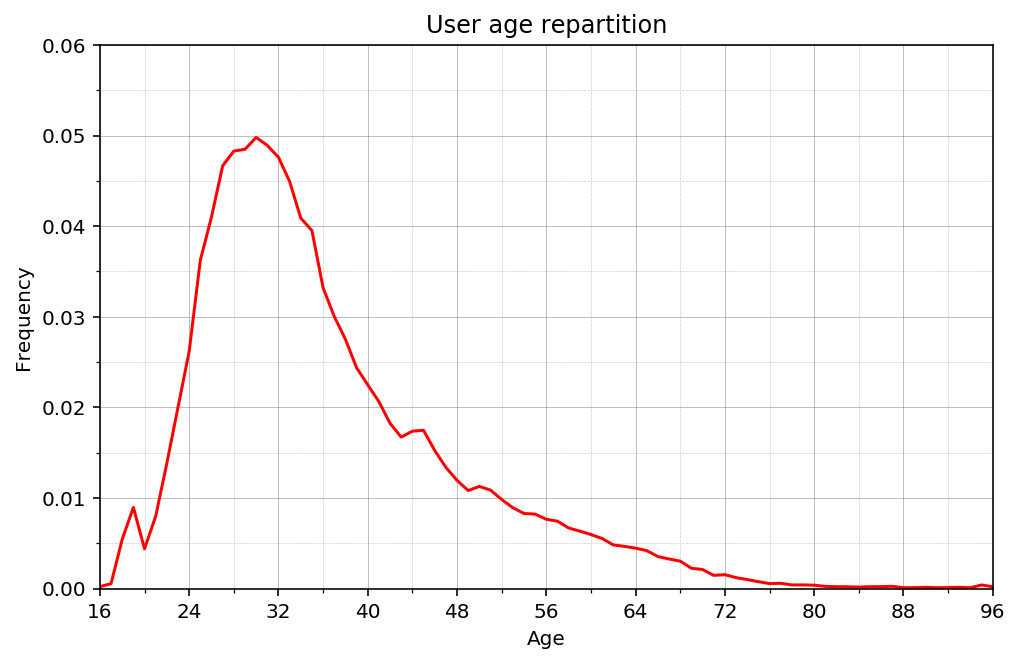

In [31]:
# Configure some variables:
age_abscissa = age.value_counts().index.tolist()
age_ordinate = [float(x)/age.value_counts().sum() for x in age.value_counts().tolist()]
zipped_age = sorted(zip(age_abscissa, age_ordinate), key=lambda x: x[0])
age_abscissa, age_ordinate = zip(*zipped_age)

# Represent the data contained in 'age':
fig, ax = plt.subplots(figsize=(8, 5))

# Configuration of the graph:
ax.set_title("User age repartition")
ax.plot(age_abscissa,
        age_ordinate,
        color='red')
ax.set_xlim(16, 96)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(20))
ax.set_xlabel('Age')
ax.set_ylim(0, 0.06)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(7))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(13))
ax.set_ylabel('Frequency')
ax.grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/train_users_2_age.png', bbox_inches='tight')

We can too give a look to the gender repartition in the dataset:

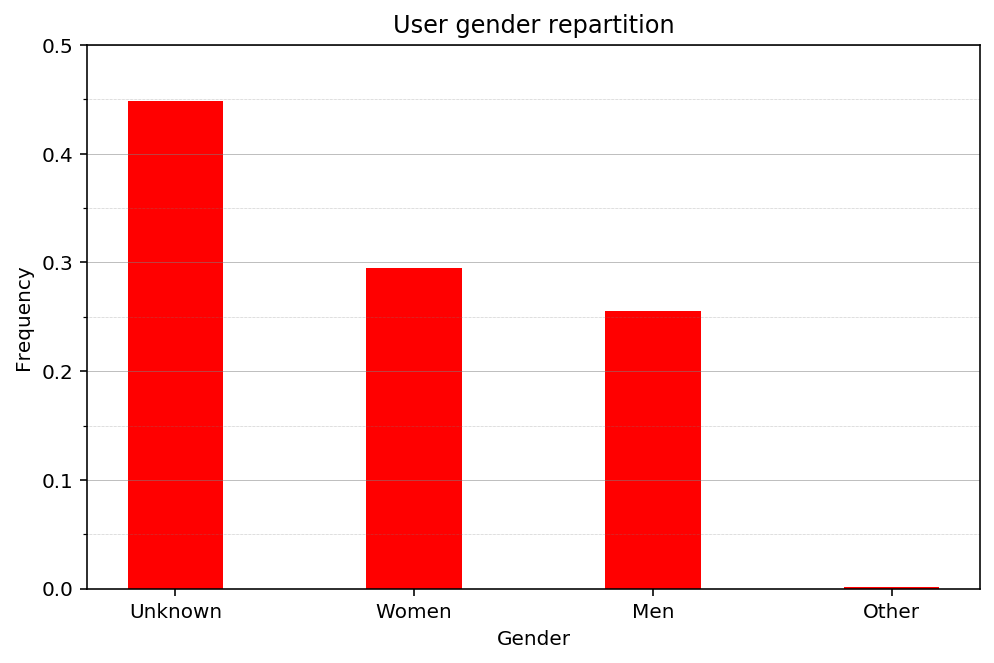

In [32]:
# Set abscissa and ordinate values:
gender = train_users_2['gender']
gender_dict = {'-unknown-': 'Unknown',
               'MALE': 'Men',
               'FEMALE': 'Women',
               'OTHER': 'Other'}
gender_list = [gender_dict[x] for x in gender.value_counts().index.tolist()]
gender_frequency = [float(x)/gender.value_counts().sum() for x in gender.value_counts().tolist()]

# Represent the data contained in countries:
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(4)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("User gender repartition")
ax.bar(x_values,
       gender_frequency,
       width=width_rec,
       color='red')
ax.set_xticks(x_values)
ax.set_xticklabels(gender_list)
ax.set_xlabel("Gender")
ax.set_ylim(0, 0.5)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(11))
ax.set_ylabel('Frequency')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/train_users_2_gender.png', bbox_inches='tight')

Finally, we are going to check the target variable, `country_destination`, and evaluate its repartition.

In [33]:
# Work on 'country_destination':
country_destination_null = train_users_2['country_destination'].isnull().sum()
country_destination_list = train_users_2['country_destination'].unique().tolist()

# Further details:
print("*** General info on 'country_destination':")
print("- Number of missing values: {}".format(country_destination_null))
print("- List of possible values: {}".format(country_destination_list))

*** General info on 'country_destination':
- Number of missing values: 0
- List of possible values: ['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU']


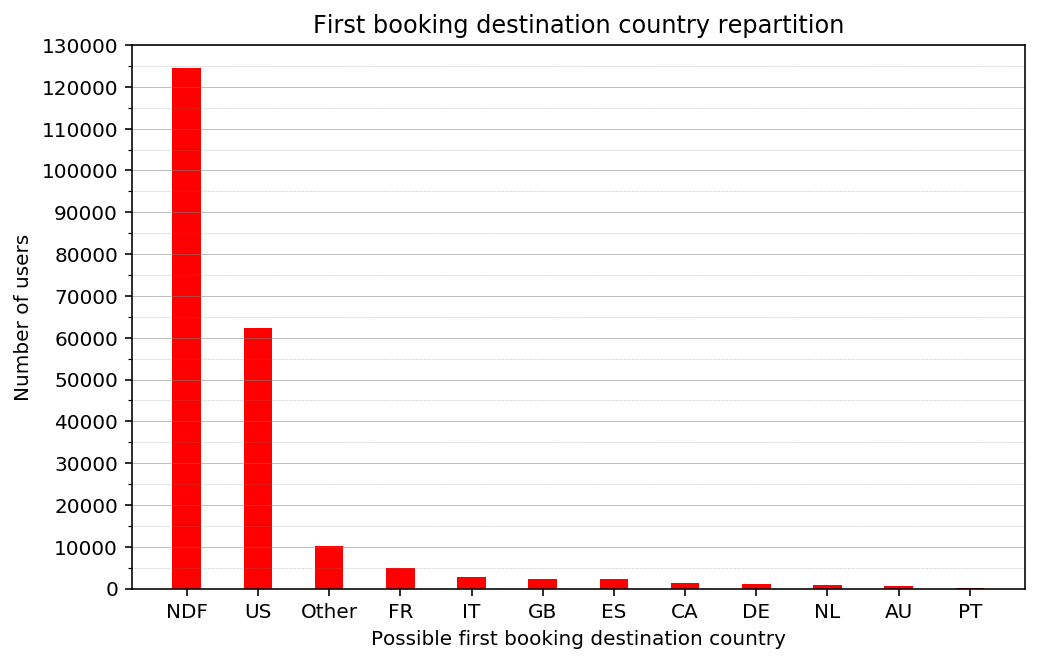

In [34]:
# Configure some variables:
country_destination = train_users_2['country_destination']
country_destination_abscissa = country_destination.value_counts().index.tolist()
country_destination_abscissa = ['Other' if x == 'other' else x for x in country_destination_abscissa]
country_destination_ordinate = country_destination.value_counts().tolist()

# Represent the data contained in 'country_destination':
fig, ax = plt.subplots(figsize=(8, 5))
x_values = np.arange(12)
width_rec = 0.4

# Configuration of the graph:
ax.set_title("First booking destination country repartition")
ax.bar(x_values,
       country_destination_ordinate,
       width=width_rec,
       color='red')
ax.set_xticks(x_values)
ax.set_xticklabels(country_destination_abscissa)
ax.set_xlabel("Possible first booking destination country")
ax.set_ylim(0, 130000)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(14))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(27))
ax.set_ylabel('Number of users')
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.25)
ax.grid(color="grey", which="minor", axis='y', linestyle=':', linewidth=0.25)

# Save the graph:
fig.savefig('../graphs/train_users_2_country_destination.png', bbox_inches='tight')

Here, it is interesting to see that a majority of the users present in the panel hadn't realized a booking (this is the signification of the value `NDF`: "No Destination Found"), and that a signification fraction of users had chosen for their first booking destination country a country which is not in the list of countries taken into account for our current project ((this is the signification of the value `Other`).

To conclude with this tabular data file, let's check how many users it has in common with the tabular data file *sessions.csv*.

In [ ]:
# Determine unique users in both tabular data files:
sessions_unique_ids = sessions['user_id'].unique().tolist()
train_users_2_unique_ids = train_users_2['id'].unique().tolist()

# Common users between tabular data files:
common_users = 0
total_users = len(train_users_2_unique_ids)
for user_id in sessions_unique_ids:
    if user_id in train_users_2_unique_ids:
        common_users += 1
common_pctg = float(common_users)/total_users*100.

# Results:
print("*** Results:")
print("{} users present in 'sessions.csv' are present too in 'train_users_2.csv'.".format(common_users))
print("This corresponds to information for {:.2f}% of users present in 'train_users_2.csv'.".format(common_pctg))

---

## Analysis

It's now time to purpose an analysis of the data - the 6 tabular data files provided by Airbnb for the Kaggle challenge - we have explored above.

Well, first, as it has been said earlier, we can discard of our analysis the tabular data files *sample_submission_NDF.csv* and *test_users.csv*, which had their interest in the context of the Kaggle challenge, but are not relevant anymore for this current project.

Secondly, the tabular data file *train_users_2.csv* is going to be the main base to construct the future training and testing datasets we will use to build our prediction model.

If the possibility to augment it with information furnished by the tabular data file *sessions.csv* exists, here, we are going to discard this option: Indeed, only approximately a third of the users present in *train_users_2.csv* can be found in *sessions.csv*, this threshold is too "low" to be considered, for a fisrt look, as interesting, and thus, we will discard this tabular data file for our study.

Nonetheless, before to explain how we will process, we can provide an analysis of the tabular data files *age_gender_bkts.csv* and *countries.csv*.

Respectively to *age_gender_bkts.csv*, which lists, for the year 2015, the volume of new users who have chosen between 10 possible destination countries (Australia, Canada, Germany, Spain, France, Great Britain, Italy, Netherlands, Portugal and USA) as their first Airbnb booking, segmented by gender and age repartition, 3 main conclusions can be made:
* Firstly, in the Airbnb's panel new users, there is an important variation between volumetries of travellers corresponding to each first booking destination country, with important proportions for the USA and a marked difference between this destination and the second in the list (Germany).
* Secondly, it appears that within each possible first booking destination country, for each age bucket, there is no significative difference between volumetries of travellers corresponding each one of the two genders (nevertheless, it can be noticed that, approximately from 75 years old, the proportion of women within travellers tends to become impacting, independently from the first booking destination country, element which can probably be put in relation with a life expectancy more important for women than for men in the USA, country from where Airbnb's panel new users come from).
* Thirdly, we can report that approximately from 50 years old, the volumetries of travellers for each possible first booking destination country tend to tumble down significantly.

Respectively to *countries.csv*, which lists some characteristics of each possible first booking destination country for Airbnb's panel new users, once again, 3 main conclusions can be made:
* Firstly, within the possible first booking destination countries, we can note 4 categories corresponding to the distance to the USA: The USA itself, Canada which is a border country, the European countries (Germany, Spain, France, Great Britain, Italy, Netherlands and Portugal), and, finally, Australia, the most distant country. We can conjecture that the nearest countries to the USA (and the USA itself per se) are going to be favored by the Airbnb's panel new users, taking into account that they come from the USA.
* Secondly, in respect to the areas of each possible first booking destination country, we can consider two main categories: A a first category of "big" countries (USA, Canada and Australia), and a second one of "small" countries (the European ones, Germany, Spain, France, Great Britain, Italy, Netherlands and Portugal). It's difficult to make assumptions on this aspect: Indeed, a country like Australia has an important part of its area that is desert or semi-arid (the center of the country) meanwhile the European countries, despite their "small" areas, are reputed for their touristic attractivity. 
* Thirdly, considering the Levenshtein distance between the language of each possible first booking destination country and the USA language, we can note 3 categories: English-speaking countries (The USA itself, Great Britain, Canada and Australia), Germanic-language-speaking countries (Germany and Netherlands) and Latin-language-speaking countries (Spain, France, Italy and Portugal). Here, we can make the assumption that English-speaking countries will be favored, then Germanic-language-speaking countries, and then Latin-language-speaking countries, by the Airbnb's panel new users, taking into account that they come from the USA.

Now, we can speak more in details the tabular data file *train_users_2.csv*, which will be the base to construct the future training and testing datasets we will use to build our prediction model.
* Firstly, the **target variable** necessary for this project is clearly identified: `country_destination`.
* Secondly, we will perform some checks on the `id` to make sure no error is present (we need to check that only unique IDs can be counted), and then, we will drop this feature.
* Thirdly, the `age` feature needs to be treated to eliminate outliers.
* Fourthly, all missing values (`NaN` values) and unprecise values (e.g. `-unknwon-`) will need to be treated carefully.
* Fifthly, we need to transform the *date features* (`date_account_created`, `timestamp_first_active` and `date_first_booking`) and extract valuable information from them.
* Sixthly, we will need to handle the *categorical features*: `gender`, `signup_method`, `language`, `affiliate_channel`, `affiliate_provider`, `first_affiliate_tracked`,  `signup_app`, `first_device_type` and `first_browser` (we will equally need to treat `signup_flow` as a categorical feature, though it contains numeric values, as these ones correspond to categories).
* Seventhly (and lastly), we will need to scale the continuous variables we are going to introduce (`nans` and `time_lag`).

After these steps, we will be able to save a consistent and consolidated data file.